# Shaped Pulse

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import qctrlvisualizer as qv

plt.style.use(qv.get_qctrl_style())

## 1-qubit

$$
H = \frac{\delta}{2} \sigma_z + \frac{\Omega(t)}{2} \sigma_x
$$

In [2]:
T = 1.0
THETA = np.pi
detunings = np.linspace(-10, 10, 200)


def flat_pulse(t, args):
    return THETA / T


def gaussian_pulse(t, args):
    mu = 0.5 * T
    sigma = T / 6
    return (
        THETA
        / (np.sqrt(2 * np.pi) * sigma)
        * np.exp(-((t - mu) ** 2) / (2 * sigma**2))
    )


def hamiltonian(detuning, pulse):
    return [
        0.5 * THETA * detuning * qt.sigmaz(),
        [0.5 * qt.sigmax(), pulse],
    ]


def simulate_one_qubit(hamiltonian, times, initial_state):
    initial_state = qt.Qobj(initial_state)
    propagators = [qt.propagator(hamiltonian, t) for t in times]
    states = [U * initial_state for U in propagators]
    states = np.array(states).squeeze()
    qv.display_bloch_sphere(states)


def plot_profile(pulse):
    times = np.linspace(0, T, 2)
    initial_state = qt.basis(2, 0)

    e_x = []
    e_y = []
    e_z = []
    for detuning in detunings:
        result = qt.sesolve(
            hamiltonian(detuning, pulse),
            initial_state,
            times,
            [
                qt.sigmax(),
                qt.sigmay(),
                qt.sigmaz(),
            ],
        )
        e_x.append(result.expect[0][-1])
        e_y.append(result.expect[1][-1])
        e_z.append(result.expect[2][-1])

    # plt.plot(detunings, e_x, label=r"$\langle\sigma_x\rangle$")
    plt.plot(detunings, e_y, label=r"$\langle\sigma_y\rangle$")
    plt.plot(detunings, e_z, label=r"$\langle\sigma_z\rangle$")
    plt.xlabel("Detuning")
    plt.ylabel("Expectation value")
    plt.legend()

### Flat

$$
\begin{aligned}
\Omega(t) &= \frac{\pi}{T}
\end{aligned}
$$

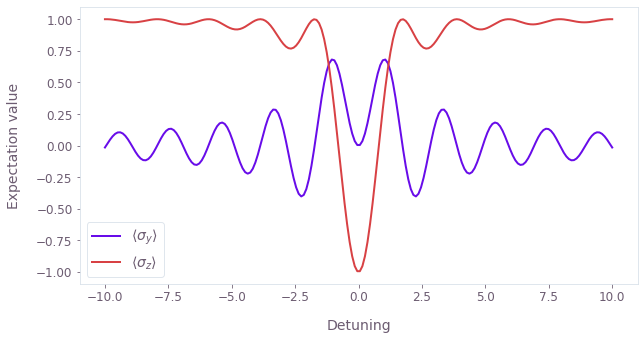

In [3]:
plot_profile(flat_pulse)

In [4]:
simulate_one_qubit(
    hamiltonian(1, flat_pulse),
    np.linspace(0, T, 30),
    qt.basis(2, 0),
)

<IPython.core.display.Javascript object>

In [5]:
result = qt.sesolve(
    hamiltonian(1, flat_pulse),
    qt.basis(2, 0),
    np.linspace(0, T, 30),
)
qv.display_bloch_sphere(np.array(result.states).squeeze())

<IPython.core.display.Javascript object>

In [6]:
result.solver

'sesolve'

### Gaussian

$$
\begin{aligned}
\Omega(t) &= \frac{\pi}{\sqrt{2\pi}\sigma}  e^{-\frac{(t - \mu)^2}{2\sigma^2}}
\end{aligned}
$$

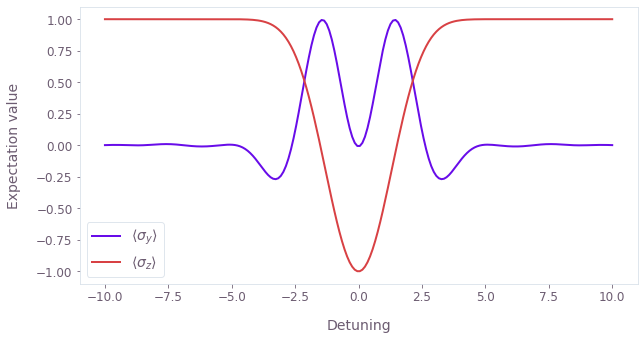

In [7]:
plot_profile(gaussian_pulse)

In [8]:
simulate_one_qubit(
    hamiltonian(1, gaussian_pulse),
    np.linspace(0, T, 30),
    qt.basis(2, 0),
)

<IPython.core.display.Javascript object>